In [1]:
%matplotlib inline
#Amitava Chakraborty - 11th Jan 2018
#Preliminaries
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister
from qiskit import BasicAer
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

# Copy and Mirror

## Copy

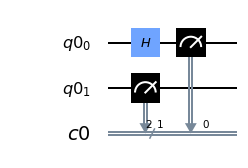

In [2]:
# copy method makes a copy of a circuit
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc1 = qc.copy()
qc1.draw('mpl')

## Modification of copied circuit

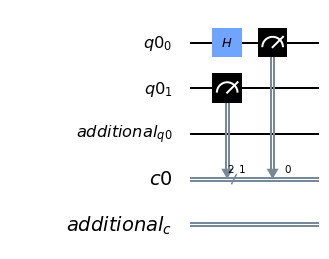

In [3]:
qc1.add_register(QuantumRegister(1, 'additional_q'))
qc1.add_register(ClassicalRegister(1, 'additional_c'))
qc1.draw('mpl')

## Active Measurement

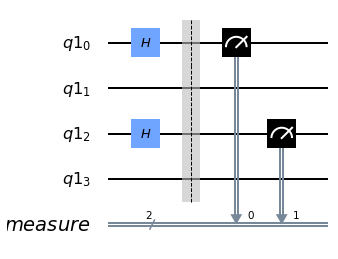

In [4]:
# measure_active - Applies measurements only to non-idle qubits
# One need to have ClassicalRegister of size equal to the amount of non-idle qubits to store the measured values.
qr = QuantumRegister(4)
cr = ClassicalRegister(2, 'measure')

circuit = QuantumCircuit(qr)
circuit.h(qr[0])
circuit.h(qr[2])
#circuit.h(qr[3])
circuit.measure_active()

circuit.draw('mpl')

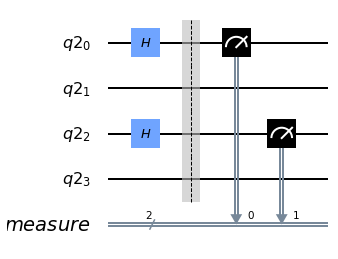

In [5]:
# measure_active copy 0 Applies measurements only to non-idle qubits

qr = QuantumRegister(4)
cr = ClassicalRegister(2, 'measure')

circuit = QuantumCircuit(qr)
circuit.h(qr[0])
circuit.h(qr[2])
new_circuit = circuit.measure_active(inplace=False)

new_circuit.draw('mpl')

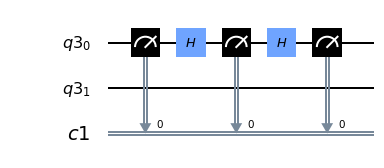

In [6]:
# Remove final measurements
# Removes all measurements at end of circuit.
qr = QuantumRegister(2)
cr = ClassicalRegister(1)

circuit = QuantumCircuit(qr, cr)
circuit.measure(qr[0], cr)
circuit.h(0)
circuit.measure(qr[0], cr)
circuit.h(0)
circuit.measure(qr[0], cr)
circuit.draw('mpl')

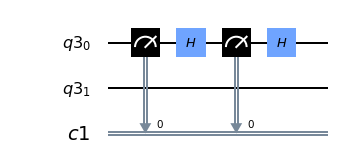

In [7]:
circuit.remove_final_measurements()
circuit.draw('mpl')

## Mirror

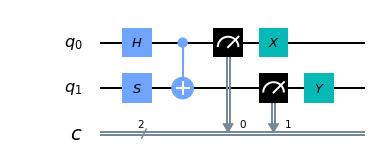

In [8]:
# mirror method reverses the circuit but does not invert
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.s(1)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.x(0)
qc.y(1)
qc.draw('mpl')

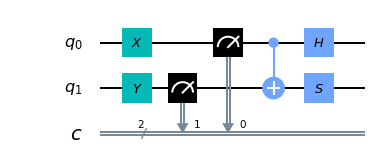

In [9]:
qc_mirrored = qc.mirror()
qc_mirrored.draw('mpl')